## <font color='white'> Bank Customer Churn. </font>

#### Importing Libraries.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

## <font color='white'> 1. Importing Dataset. </font>

#### Here we are reading the database using the name "df" in the variable.

In [80]:
df = pd.read_csv('./datasets/Churn Modeling.csv')

Variables:

1. **RowNumber**
2. **CustomerId**
3. **Surname**
4. **CreditScore**
5. **Geography**
6. **Gender**
7. **Age**
8. **Tenure**: refers to the number of years that the customer has been a client of the bank
9. **Balance**: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10. **NumOfProducts**: refers to the number of products that a customer has purchased through the bank.
11. **HasCrCard**: denotes whether or not a customer has a credit card
12. **IsActiveMember**
13. **EstimatedSalary**
14. **Exited**: whether or not the customer left the bank.

In [22]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## <font color='white'> 2. Data Analysis. </font>

#### Verifying the correlation between our variables.

In [11]:
#Delete columns that I won't use in the model
df.drop(['RowNumber', 'Surname','CustomerId'], axis='columns', inplace=True)

<Axes: >

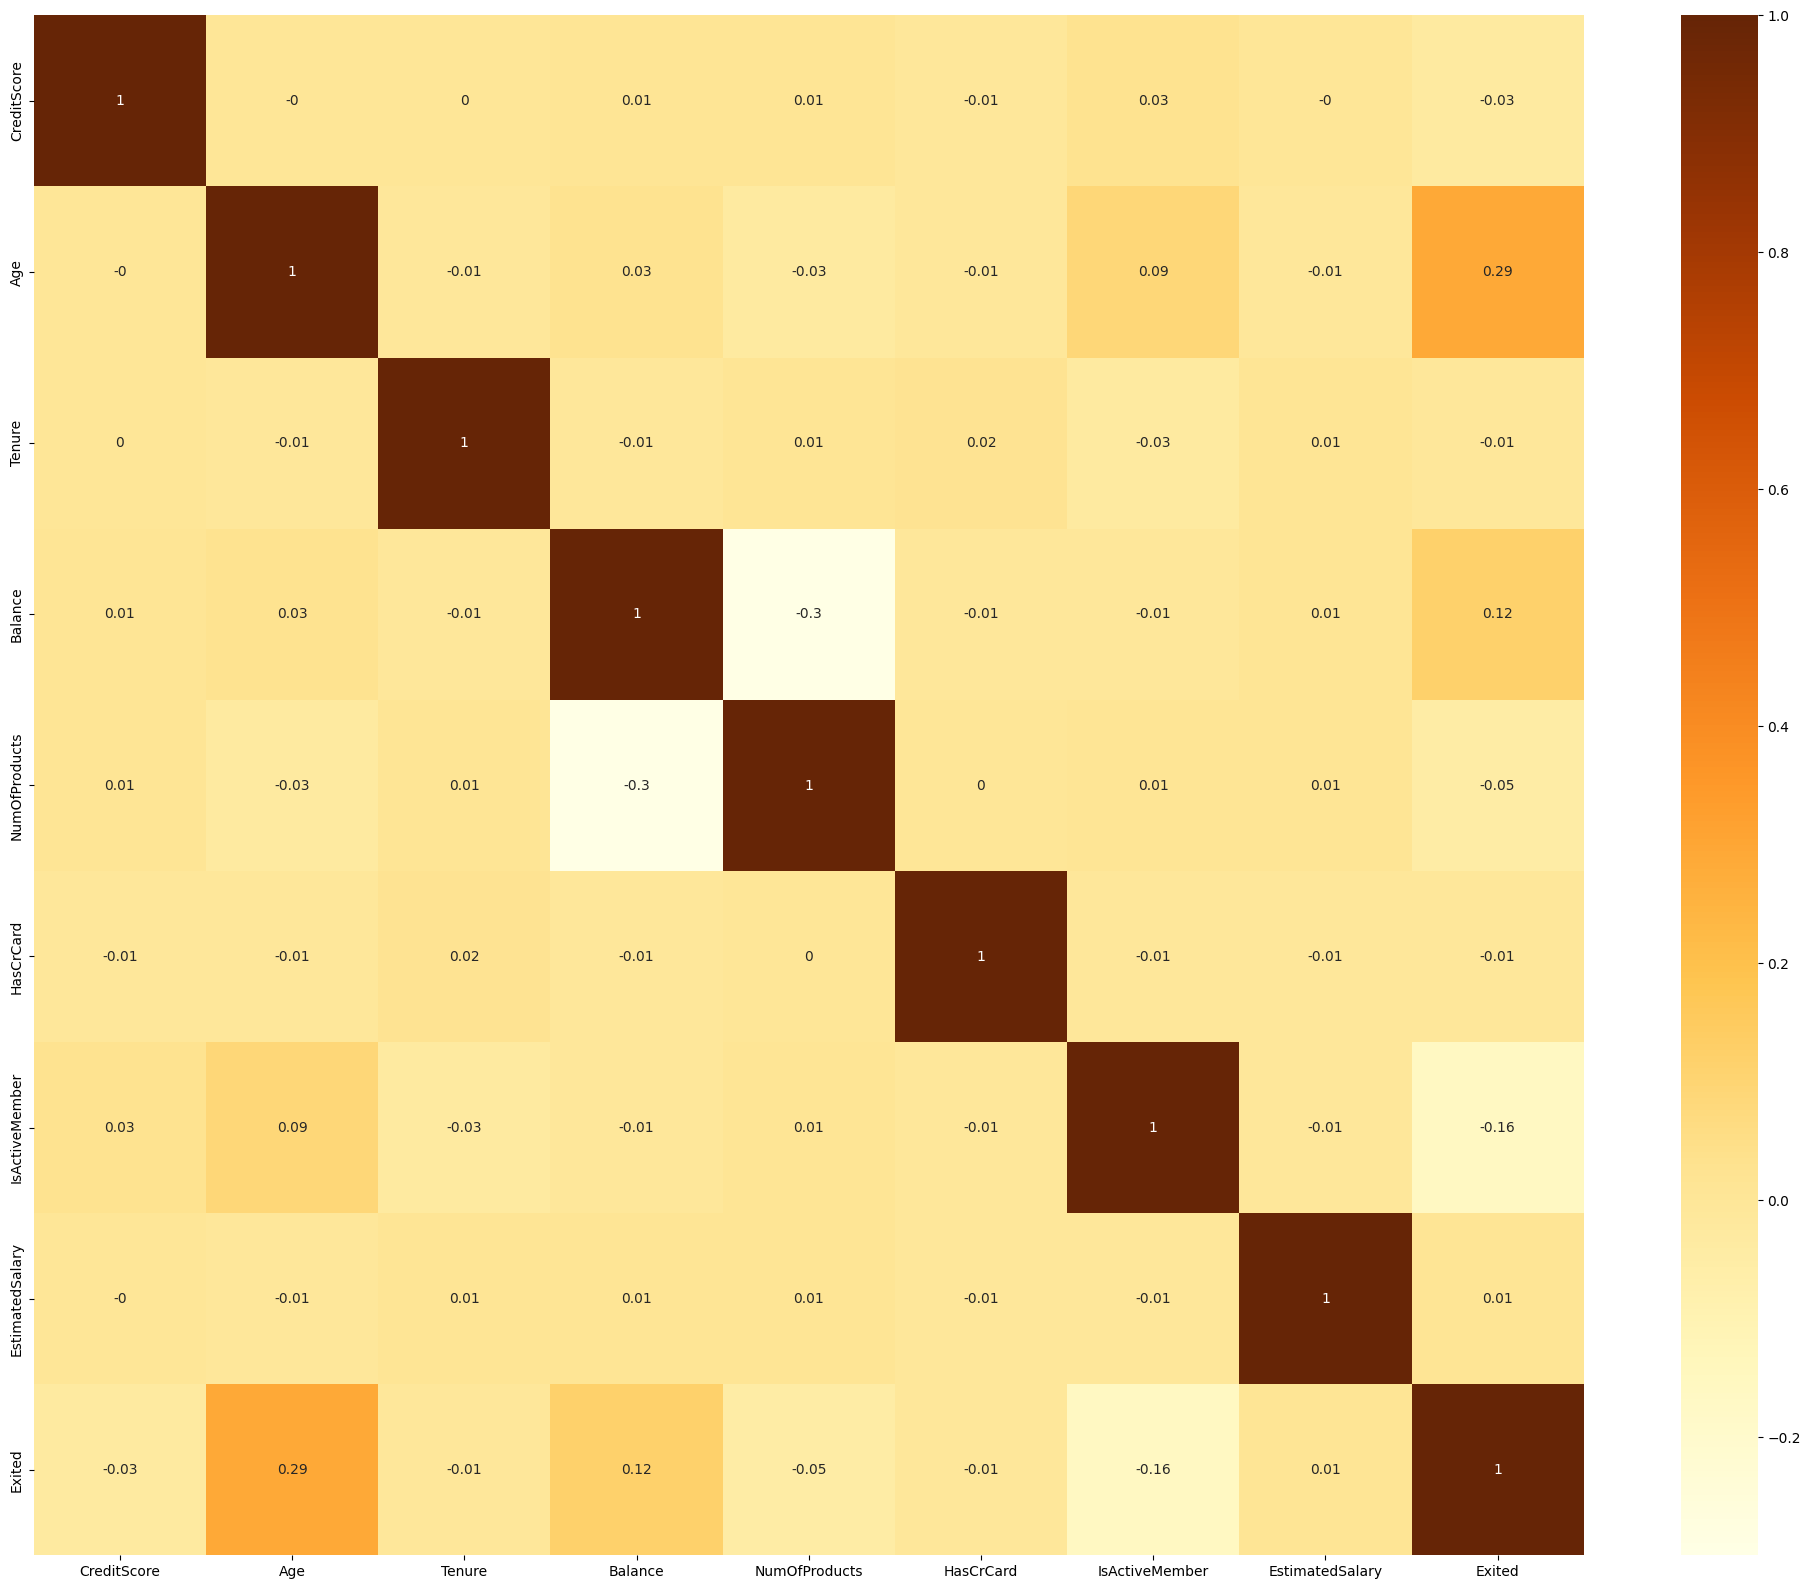

In [13]:
#Correlation matrix (only for numerical columns)
corr = df.select_dtypes(include=['number']).corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

#### Column Charts.

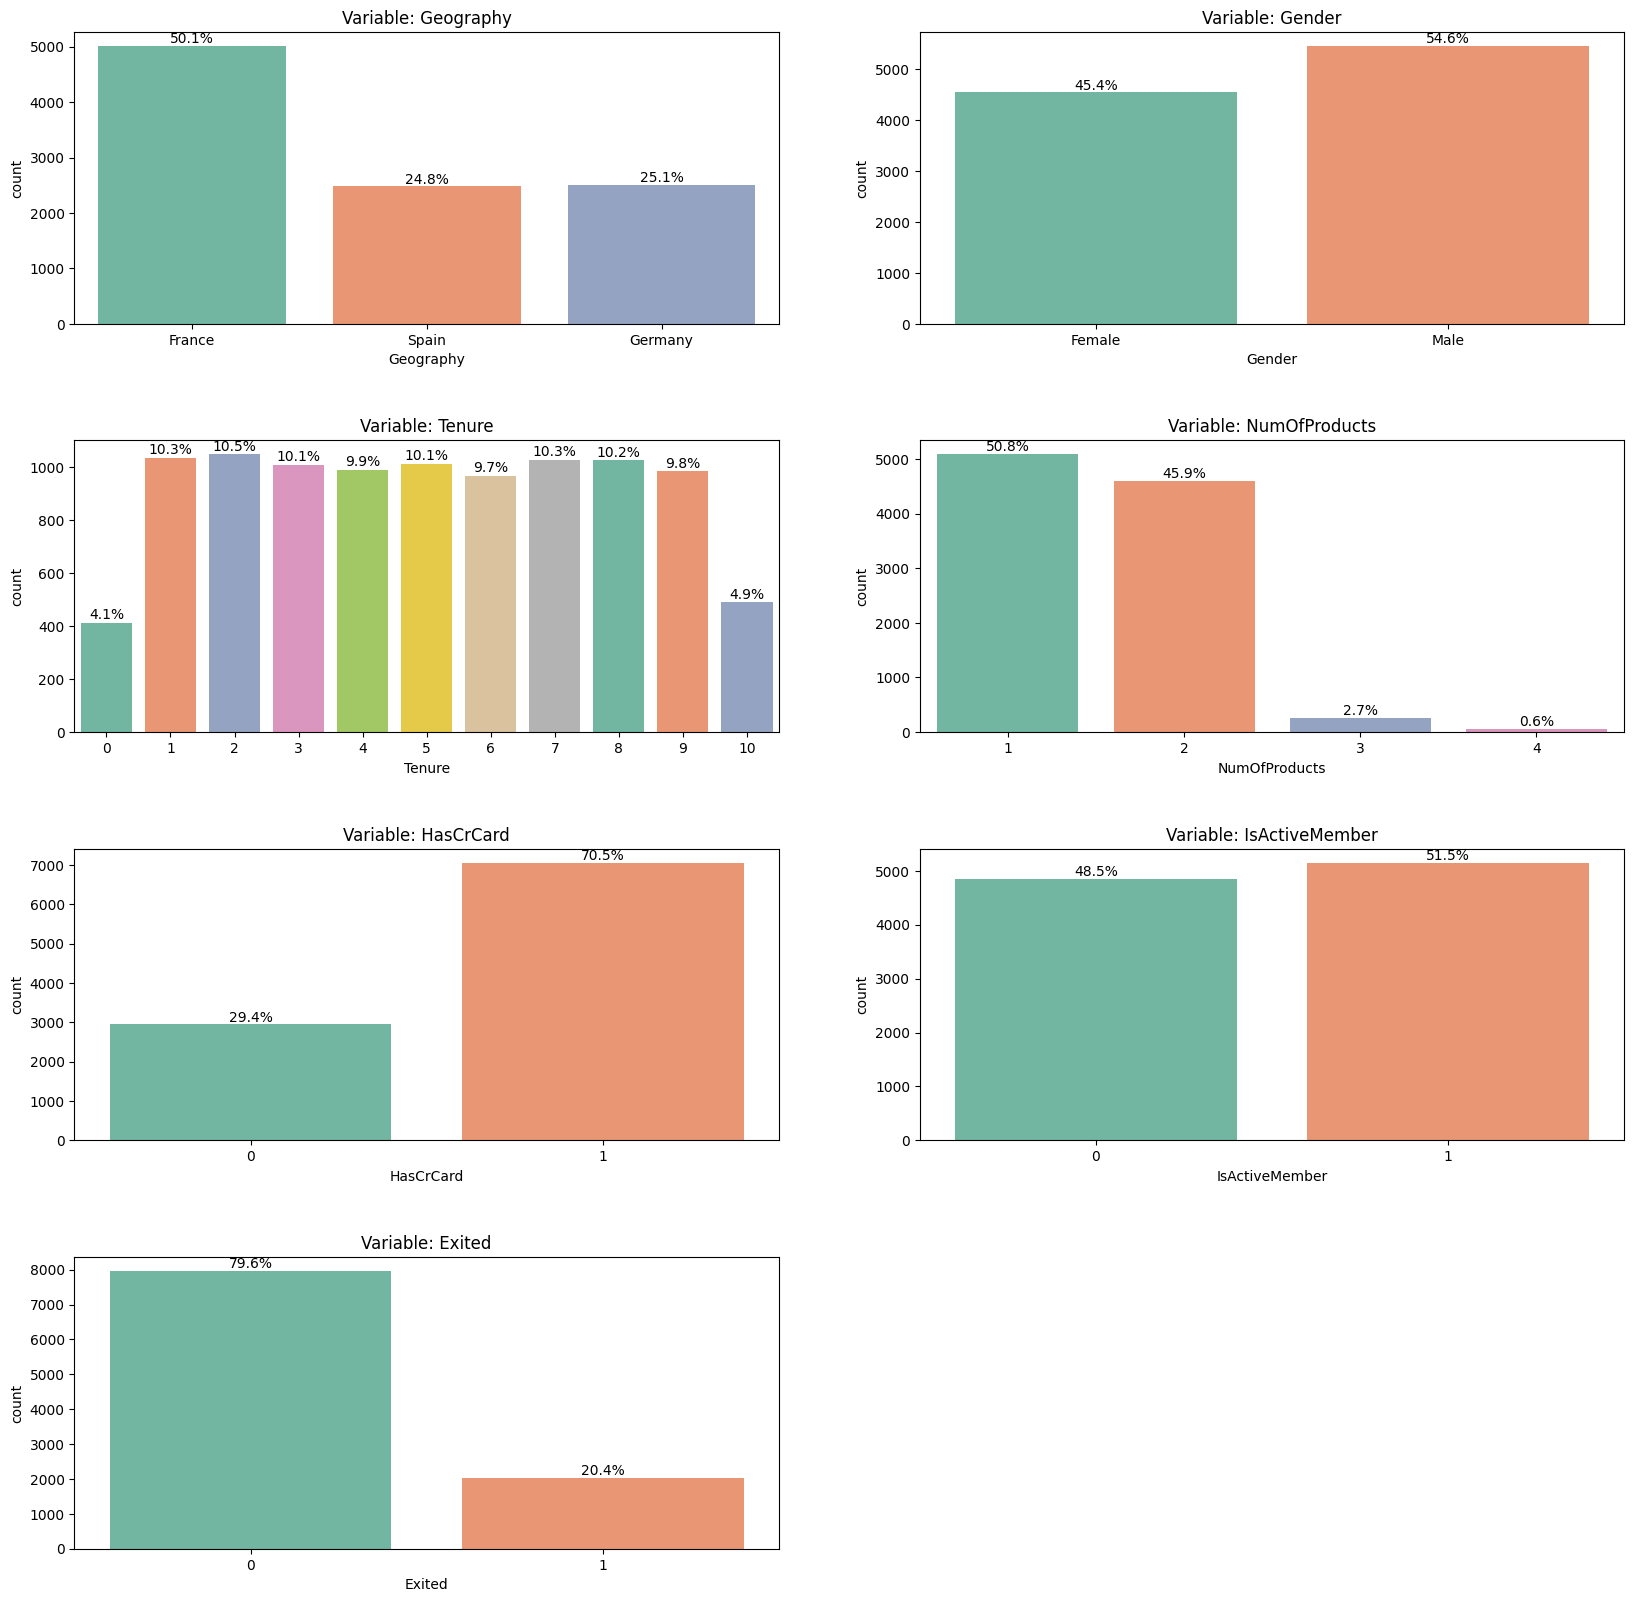

In [41]:
columns = ['Geography','Gender','Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited' ]

plt.figure(figsize = (20, 25))
i = 1

for column in columns:

    plt.subplot(5, 2, i)
    plt.gca().set_title(f"Variable: {column}")
    plt.subplots_adjust(hspace=0.4)
    sns.countplot(x = column , palette = 'Set2', data = df)

    # Calculate and add percentage labels
    total = float(len(df[column]))
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 3,
                       '{:.1%}'.format(height / total),
                       ha='center', va='bottom')

    i += 1

        


#### Histograms.

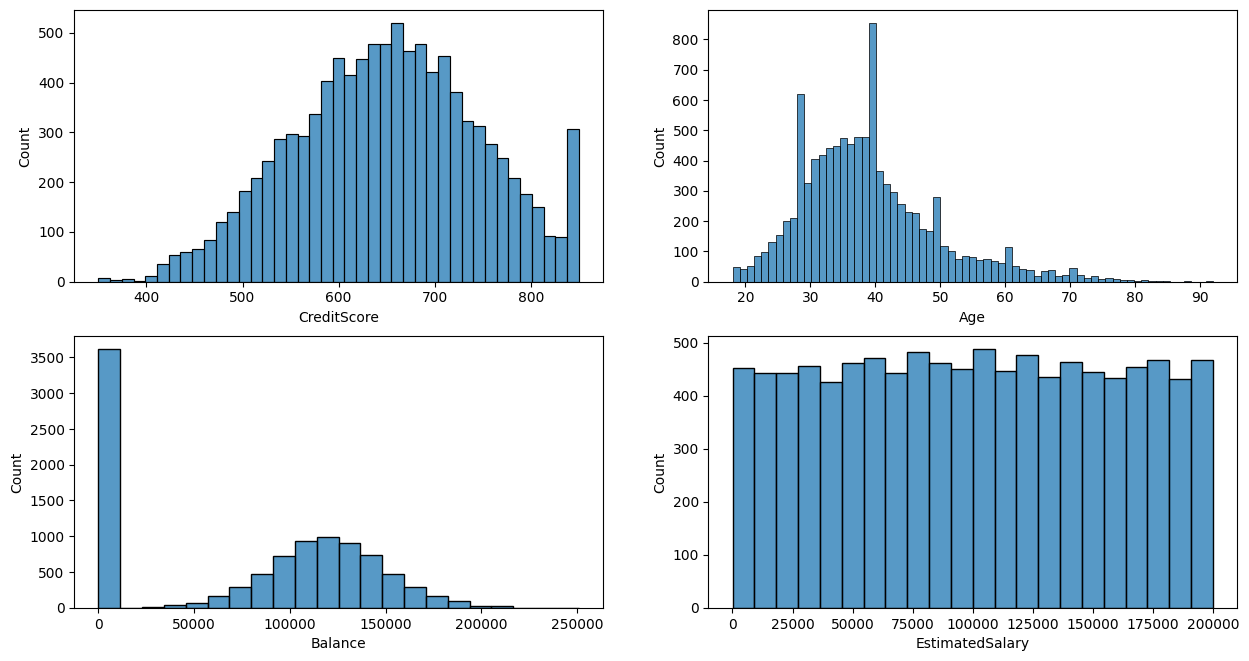

In [45]:
columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.figure(figsize = (15, 12))
i = 1
for column in columns:
    plt.subplot(3, 2, i)
    sns.histplot(x = df[column], kde = False)

    i += 1

#### Looking at the boxplots of our continuous variables we can see that we have few outliers, for now we will leave them.

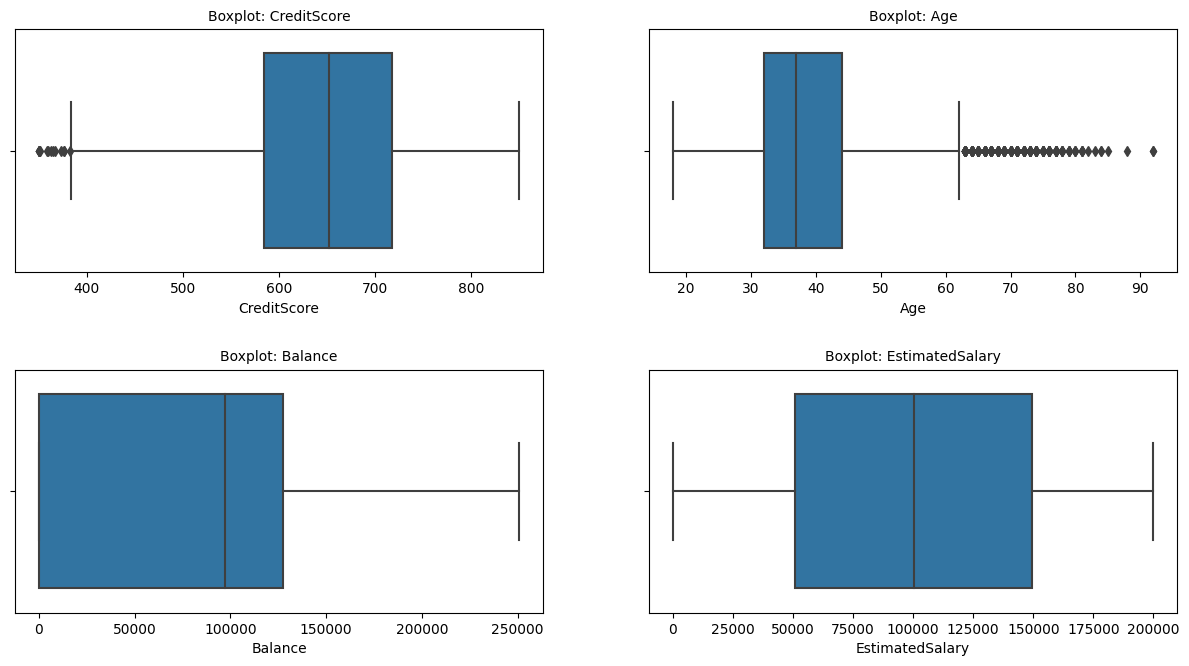

In [51]:
columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.figure(figsize = (15, 12))
i = 1
for column in columns:
    plt.subplot(3, 2, i)
    plt.subplots_adjust(hspace=0.4)
    plt.title(f"Boxplot: {column}", fontdict = {'fontsize': 10})
    sns.boxplot(x=df[column])

    i += 1

#### Bivariate Analysis.

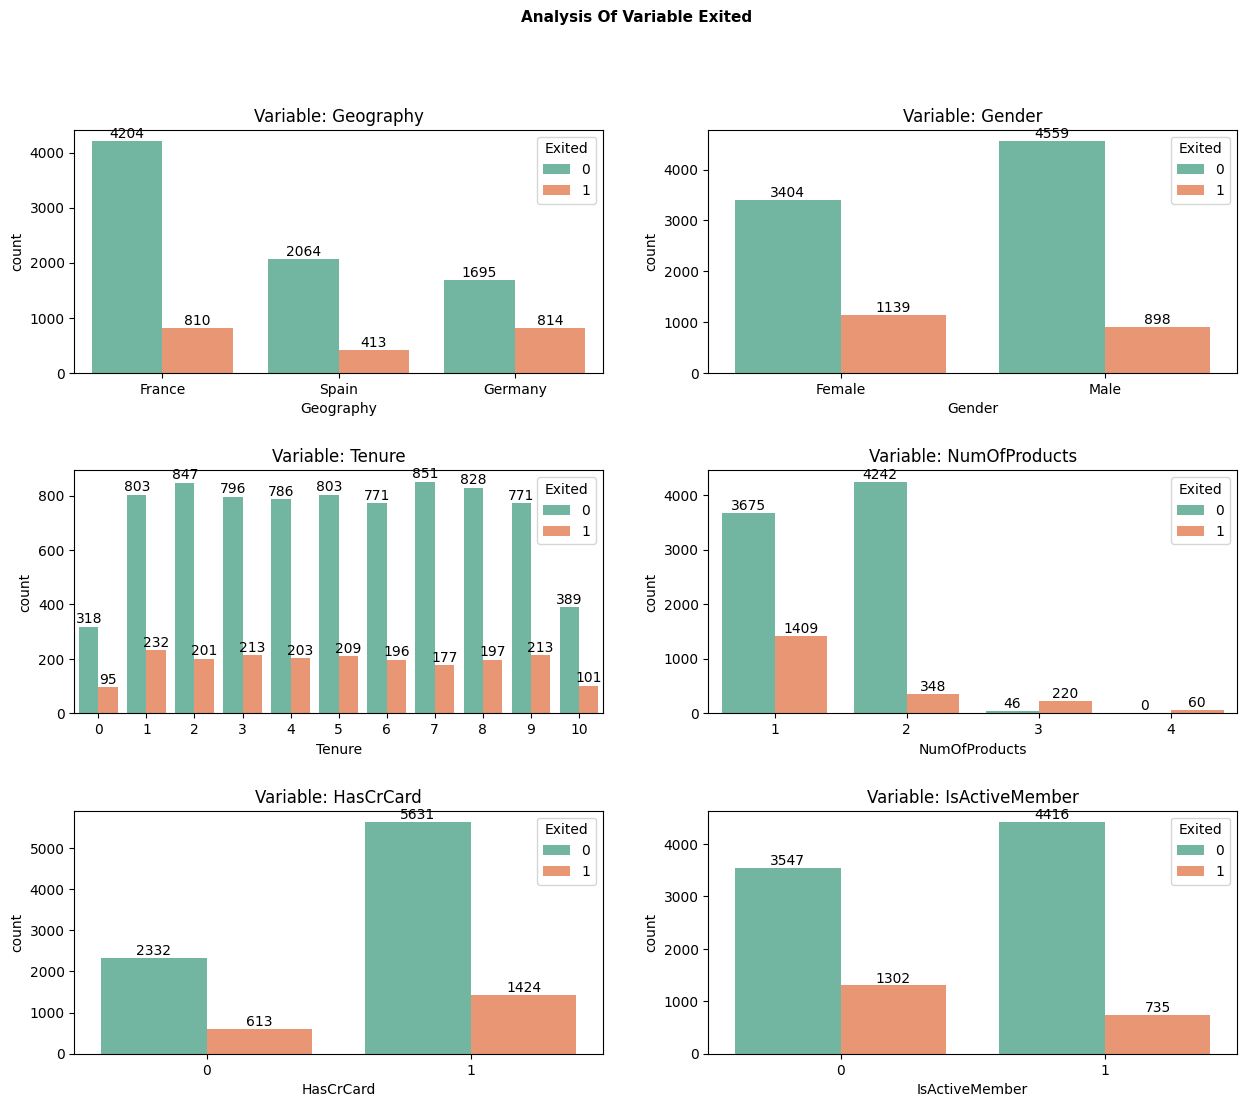

In [70]:
columns = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
plt.figure(figsize = (15, 12))
i = 1
for column in columns:
    plt.subplot(3, 2, i)
    plt.subplots_adjust(hspace=0.4)
    plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=11)
    plt.title(f"Boxplot: {column}", fontdict = {'fontsize': 10})
    
    plt.gca().set_title(f"Variable: {column}")
    sns.countplot(x = column , hue = 'Exited', palette = 'Set2', data = df)

    # Calculate and add percentage labels
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 3,
                       int(height),
                       ha='center', va='bottom')

    i += 1

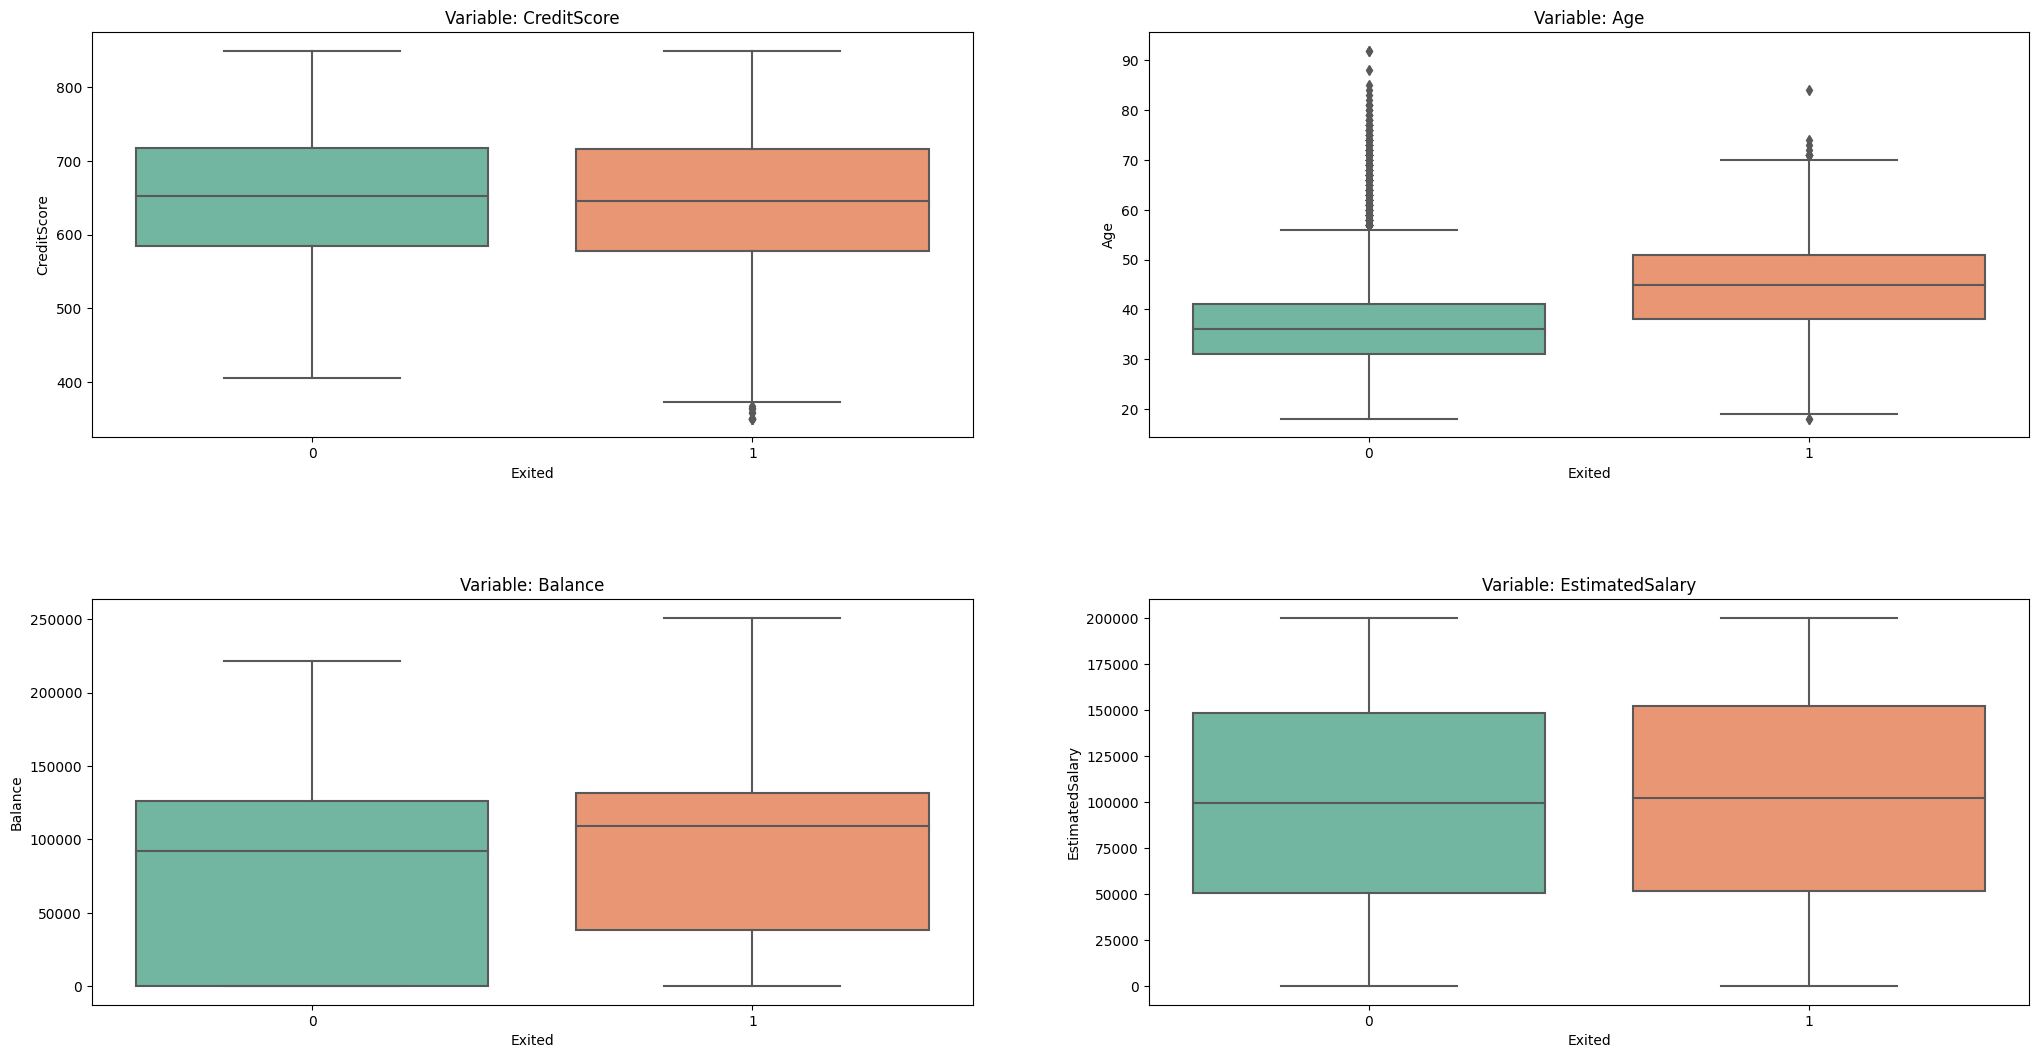

In [78]:
columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
plt.figure(figsize = (25, 20))
i = 1
for column in columns:
    plt.subplot(3,2,i)
    plt.gca().set_title(f"Variable: {column}")
    plt.subplots_adjust(hspace=0.4)
    sns.boxplot(x="Exited", y=column, data=df, palette = 'Set2')

    i += 1

## <font color='white'> 3. Model Building. </font>

#### Here we will eliminate the RowNumber, CustomerID and Surname variables that will not be used in the model.

In [81]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### OneHot Label Encoder
- Here we are going to use the OneHotLabel Encoder to transform our categorical variables into continuous variables.

In [83]:
hot = pd.get_dummies(df[['Geography', 'Gender']])

In [85]:
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Geography', 'Gender'], axis = 1)

#### Separating into features variables and target variable.

In [86]:
X = df.drop('Exited', axis = 1)
X = X.values
y = df['Exited']

#### StandardScaler
- Here we will use StandardScaler to put our data in the same scale.

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

#### Balancing Classes
- As we have many values ​​of a class and few values ​​of others, we will balance the classes using OverSampling to make the classes balanced.

In [91]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

#### Naive Bayes
#### Running Gaussian Model.
- Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data.

In [95]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy
accuracy_naive_bayes = accuracy_score(y_test, previsoes)

# Calculate precision
precision = precision_score(y_test, previsoes)

# Calculate recall
recall = recall_score(y_test, previsoes)

# Calculate F1-score
f1 = f1_score(y_test, previsoes)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, previsoes)

print("Accuracy:", accuracy_naive_bayes)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.5773333333333334
Precision: 0.25547996976568405
Recall: 0.5442834138486312
F1-Score: 0.3477366255144033
Confusion Matrix:
 [[1394  985]
 [ 283  338]]


In [97]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2379
           1       0.39      0.70      0.50       621

    accuracy                           0.71      3000
   macro avg       0.64      0.70      0.65      3000
weighted avg       0.79      0.71      0.73      3000



#### Decision Tree

In [135]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

# Get the best model from the grid search
best_model = gridDecisionTree.best_estimator_

# Predict using the best model on the test data
prediction = best_model.predict(X_test)

In [136]:
# Calculate accuracy
accuracy_gridDecisionTree = accuracy_score(y_test, prediction)

# Calculate precision
precision = precision_score(y_test, prediction)

# Calculate recall
recall = recall_score(y_test, prediction)

# Calculate F1-score
f1 = f1_score(y_test, prediction)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)

print("Accuracy:", accuracy_gridDecisionTree)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7723333333333333
Precision: 0.46547884187082406
Recall: 0.6731078904991948
F1-Score: 0.5503620803159973
Confusion Matrix:
 [[1899  480]
 [ 203  418]]


#### Checking the most important variables of the model.

In [102]:
columns = df.drop('Exited', axis = 1).columns
feature_imp = pd.Series(best_model.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

Age                  0.305635
NumOfProducts        0.184844
Balance              0.148525
EstimatedSalary      0.113688
CreditScore          0.091308
IsActiveMember       0.047717
Tenure               0.041486
Geography_Germany    0.037852
Gender_Female        0.011010
Geography_Spain      0.007157
Geography_France     0.005472
Gender_Male          0.002708
HasCrCard            0.002597
dtype: float64

#### RandomForest

In [137]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

best_model_RandomForest = gridRandomForest.best_estimator_
prediction = best_model_RandomForest.predict(X_test)

In [138]:
# Calculate accuracy
accuracy_gridRandomForest = accuracy_score(y_test, prediction)

# Calculate precision
precision = precision_score(y_test, prediction)

# Calculate recall
recall = recall_score(y_test, prediction)

# Calculate F1-score
f1 = f1_score(y_test, prediction)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)

print("Accuracy:", accuracy_gridRandomForest)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8146666666666667
Precision: 0.5381008206330598
Recall: 0.7391304347826086
F1-Score: 0.6227951153324287
Confusion Matrix:
 [[1985  394]
 [ 162  459]]


#### Checking the most important variables of the model.

In [105]:
feature_imp_random = pd.Series(best_model_RandomForest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

Age                  0.370767
NumOfProducts        0.275594
Balance              0.087245
IsActiveMember       0.058796
Geography_Germany    0.053314
CreditScore          0.040659
EstimatedSalary      0.032567
Tenure               0.018846
Gender_Female        0.017627
Geography_France     0.017263
Gender_Male          0.015256
Geography_Spain      0.007839
HasCrCard            0.004228
dtype: float64

#### Extra Trees

In [139]:
from sklearn.ensemble import ExtraTreesClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = ExtraTreesClassifier()
gridExtraTrees = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridExtraTrees.fit(X_train, y_train)

best_model_gridExtraTrees = gridExtraTrees.best_estimator_
prediction = best_model_gridExtraTrees.predict(X_test)

In [140]:
# Calculate accuracy
accuracy_gridExtraTrees = accuracy_score(y_test, prediction)

# Calculate precision
precision = precision_score(y_test, prediction)

# Calculate recall
recall = recall_score(y_test, prediction)

# Calculate F1-score
f1 = f1_score(y_test, prediction)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)

print("Accuracy:", accuracy_gridExtraTrees)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8066666666666666
Precision: 0.5249695493300852
Recall: 0.6940418679549114
F1-Score: 0.5977808599167822
Confusion Matrix:
 [[1989  390]
 [ 190  431]]


#### K-Means
- Here we will use the K Means Model.

In [108]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state= 0)
model.fit(X_train)
previsoes = model.predict(X_test)
classification_kmeans_standard = (accuracy_score(y_test, previsoes))
print(classification_kmeans_standard)

c:\Users\santiago.bruzza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5773333333333334


#### K-Neighbors

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)


grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8869090257879656)

#### Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
prediction = logistic.predict(X_test)

In [142]:
# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, prediction)

# Calculate precision
precision = precision_score(y_test, prediction)

# Calculate recall
recall = recall_score(y_test, prediction)

# Calculate F1-score
f1 = f1_score(y_test, prediction)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)

print("Accuracy:", accuracy_logistic)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.707
Precision: 0.3884083044982699
Recall: 0.7230273752012882
F1-Score: 0.5053460889138999
Confusion Matrix:
 [[1672  707]
 [ 172  449]]


#### AdaBoost

In [143]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005],
              'n_estimators': [300, 500]
             }

model = AdaBoostClassifier()
gridAdaBoost = RandomizedSearchCV(model, parameters, cv = 2, n_jobs = -1)
gridAdaBoost.fit(X_train, y_train)

best_model_gridAdaBoost = gridAdaBoost.best_estimator_
prediction = best_model_gridAdaBoost.predict(X_test)

In [144]:
# Calculate accuracy
accuracy_gridAdaBoost = accuracy_score(y_test, prediction)

# Calculate precision
precision = precision_score(y_test, prediction)

# Calculate recall
recall = recall_score(y_test, prediction)

# Calculate F1-score
f1 = f1_score(y_test, prediction)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)

print("Accuracy:", accuracy_gridAdaBoost)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7826666666666666
Precision: 0.48454636091724823
Recall: 0.782608695652174
F1-Score: 0.5985221674876846
Confusion Matrix:
 [[1862  517]
 [ 135  486]]


#### Gradient Boosting

In [145]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005],
              'n_estimators': [300, 500]
             }


model = GradientBoostingClassifier()
gridGradient = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridGradient.fit(X_train, y_train)

best_model_gridGradient = gridGradient.best_estimator_
prediction = best_model_gridGradient.predict(X_test)

In [146]:
# Calculate accuracy
accuracy_gridGradient = accuracy_score(y_test, prediction)

# Calculate precision
precision = precision_score(y_test, prediction)

# Calculate recall
recall = recall_score(y_test, prediction)

# Calculate F1-score
f1 = f1_score(y_test, prediction)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)

print("Accuracy:", accuracy_gridGradient)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.819
Precision: 0.5568513119533528
Recall: 0.6151368760064412
F1-Score: 0.5845447589900535
Confusion Matrix:
 [[2075  304]
 [ 239  382]]


#### LGBM

In [147]:
from lightgbm import LGBMClassifier

parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'min_child_samples': [1, 3, 5, 7, 9, 15],
              'num_leaves': [3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }
    
model = LGBMClassifier()
lgbm_grid = RandomizedSearchCV(model,parameters, cv = 3, n_jobs = -1)
lgbm_grid.fit(X_train, y_train.ravel())

best_model_lgbm_grid = lgbm_grid.best_estimator_
prediction = best_model_lgbm_grid.predict(X_test)


[LightGBM] [Info] Number of positive: 5584, number of negative: 5584
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 866
[LightGBM] [Info] Number of data points in the train set: 11168, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [148]:
# Calculate accuracy
accuracy_lgbm_grid = accuracy_score(y_test, prediction)

# Calculate precision
precision = precision_score(y_test, prediction)

# Calculate recall
recall = recall_score(y_test, prediction)

# Calculate F1-score
f1 = f1_score(y_test, prediction)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)

print("Accuracy:", accuracy_lgbm_grid)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8123333333333334
Precision: 0.5423976608187134
Recall: 0.5974235104669887
F1-Score: 0.5685823754789273
Confusion Matrix:
 [[2066  313]
 [ 250  371]]


#### XGB Boost

In [149]:
from xgboost.sklearn import XGBClassifier

parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }

model = XGBClassifier()
xgb_grid = RandomizedSearchCV(model,parameters, cv = 2, n_jobs = -1)
xgb_grid.fit(X_train, y_train)

best_model_xgb_grid = xgb_grid.best_estimator_
prediction = best_model_xgb_grid.predict(X_test)

In [150]:
# Calculate accuracy
accuracy_xgb_grid = accuracy_score(y_test, prediction)

# Calculate precision
precision = precision_score(y_test, prediction)

# Calculate recall
recall = recall_score(y_test, prediction)

# Calculate F1-score
f1 = f1_score(y_test, prediction)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)

print("Accuracy:", accuracy_xgb_grid)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8153333333333334
Precision: 0.5522620904836193
Recall: 0.5700483091787439
F1-Score: 0.5610142630744849
Confusion Matrix:
 [[2092  287]
 [ 267  354]]


#### Checking key variables to predict the outcome.
- Chi 2

In [130]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score']) 

featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
Balance,7151302.78
EstimatedSalary,48350.88
Age,2300.42
Geography_Germany,225.46
IsActiveMember,118.20
CreditScore,105.40
Gender_Female,61.91
Geography_France,54.92
Gender_Male,51.54
Geography_Spain,20.87


#### Decision Tree.

In [131]:
feature_imp

Age                  0.305635
NumOfProducts        0.184844
Balance              0.148525
EstimatedSalary      0.113688
CreditScore          0.091308
IsActiveMember       0.047717
Tenure               0.041486
Geography_Germany    0.037852
Gender_Female        0.011010
Geography_Spain      0.007157
Geography_France     0.005472
Gender_Male          0.002708
HasCrCard            0.002597
dtype: float64

#### Random Forest.

In [132]:
feature_imp_random

Age                  0.370767
NumOfProducts        0.275594
Balance              0.087245
IsActiveMember       0.058796
Geography_Germany    0.053314
CreditScore          0.040659
EstimatedSalary      0.032567
Tenure               0.018846
Gender_Female        0.017627
Geography_France     0.017263
Gender_Male          0.015256
Geography_Spain      0.007839
HasCrCard            0.004228
dtype: float64

#### Checking the results.

In [153]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Accuracy':accuracy_naive_bayes}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Accuracy':accuracy_gridDecisionTree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Accuracy':accuracy_gridRandomForest}

Extra_dict = {'Model':'Extra Trees',
               'Scaling':'Normal Data',
               'Accuracy':accuracy_gridExtraTrees}


Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Accuracy':accuracy_logistic}

ada_dict_v1 = {'Model':'AdaBoost',
               'Scaling':'StandardScaler',
               'Accuracy':accuracy_gridAdaBoost}

grad_dict_v1 = {'Model':'GradientBoost',
               'Scaling':'StandardScaler',
               'Accuracy':accuracy_gridGradient}

xgb_dict_v1 = {'Model':'XGB',
               'Scaling':'StandardScaler',
               'Accuracy':accuracy_xgb_grid}

lgbm_dict_v1 = {'Model':'LGBM',
               'Scaling':'StandardScaler',
               'Accuracy':accuracy_lgbm_grid}

resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Extra Trees':pd.Series(Extra_dict),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                       'AdaBoost':pd.Series(ada_dict_v1),
                       'GradientBoosting':pd.Series(grad_dict_v1),
                       'XGB':pd.Series(xgb_dict_v1),
                       'LGBM':pd.Series(lgbm_dict_v1)
                      })

resume

,Naive Bayes,Decision Tree,Random Forest,Extra Trees,Logistic Regression,AdaBoost,GradientBoosting,XGB,LGBM
Model,Naive Bayes,Decision Tree,Random Forest,Extra Trees,Logistic Regression,AdaBoost,GradientBoost,XGB,LGBM
Scaling,Normal Data,Normal Data,Normal Data,Normal Data,Normal Data,StandardScaler,StandardScaler,StandardScaler,StandardScaler
Accuracy,0.577333,0.772333,0.814667,0.806667,0.707,0.782667,0.819,0.815333,0.812333
